<a href="https://colab.research.google.com/github/TusharGwal/Machine-Learning/blob/main/Clustering/hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering

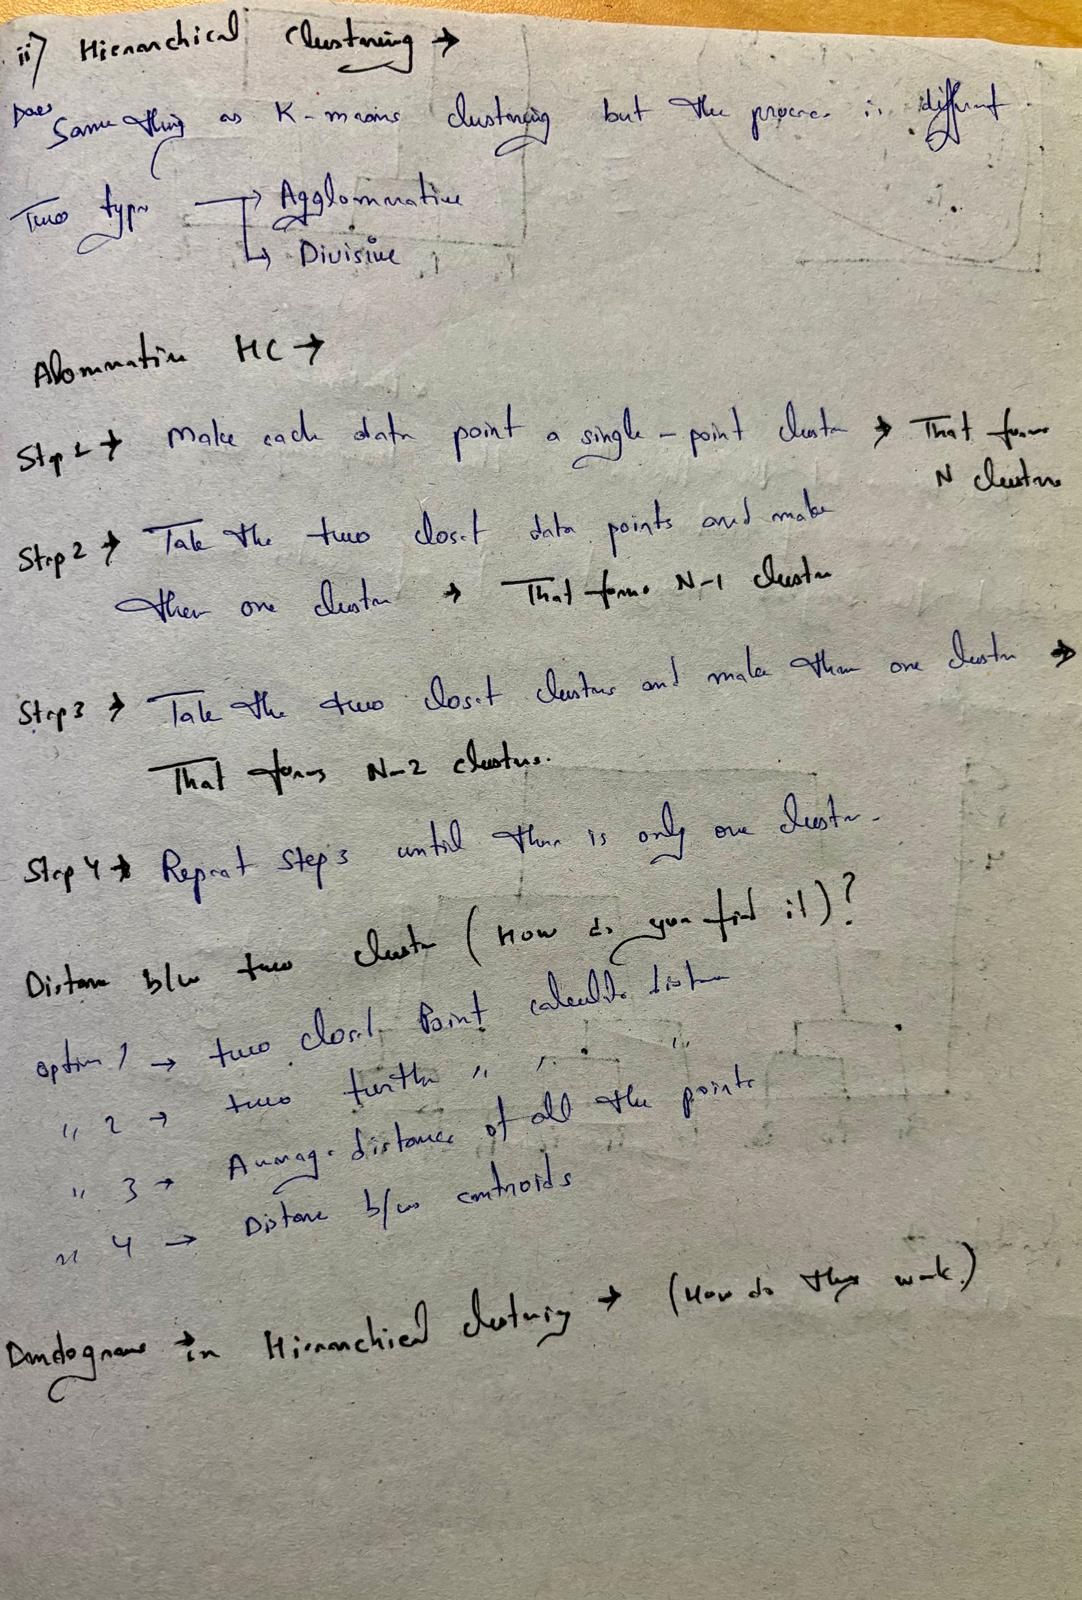

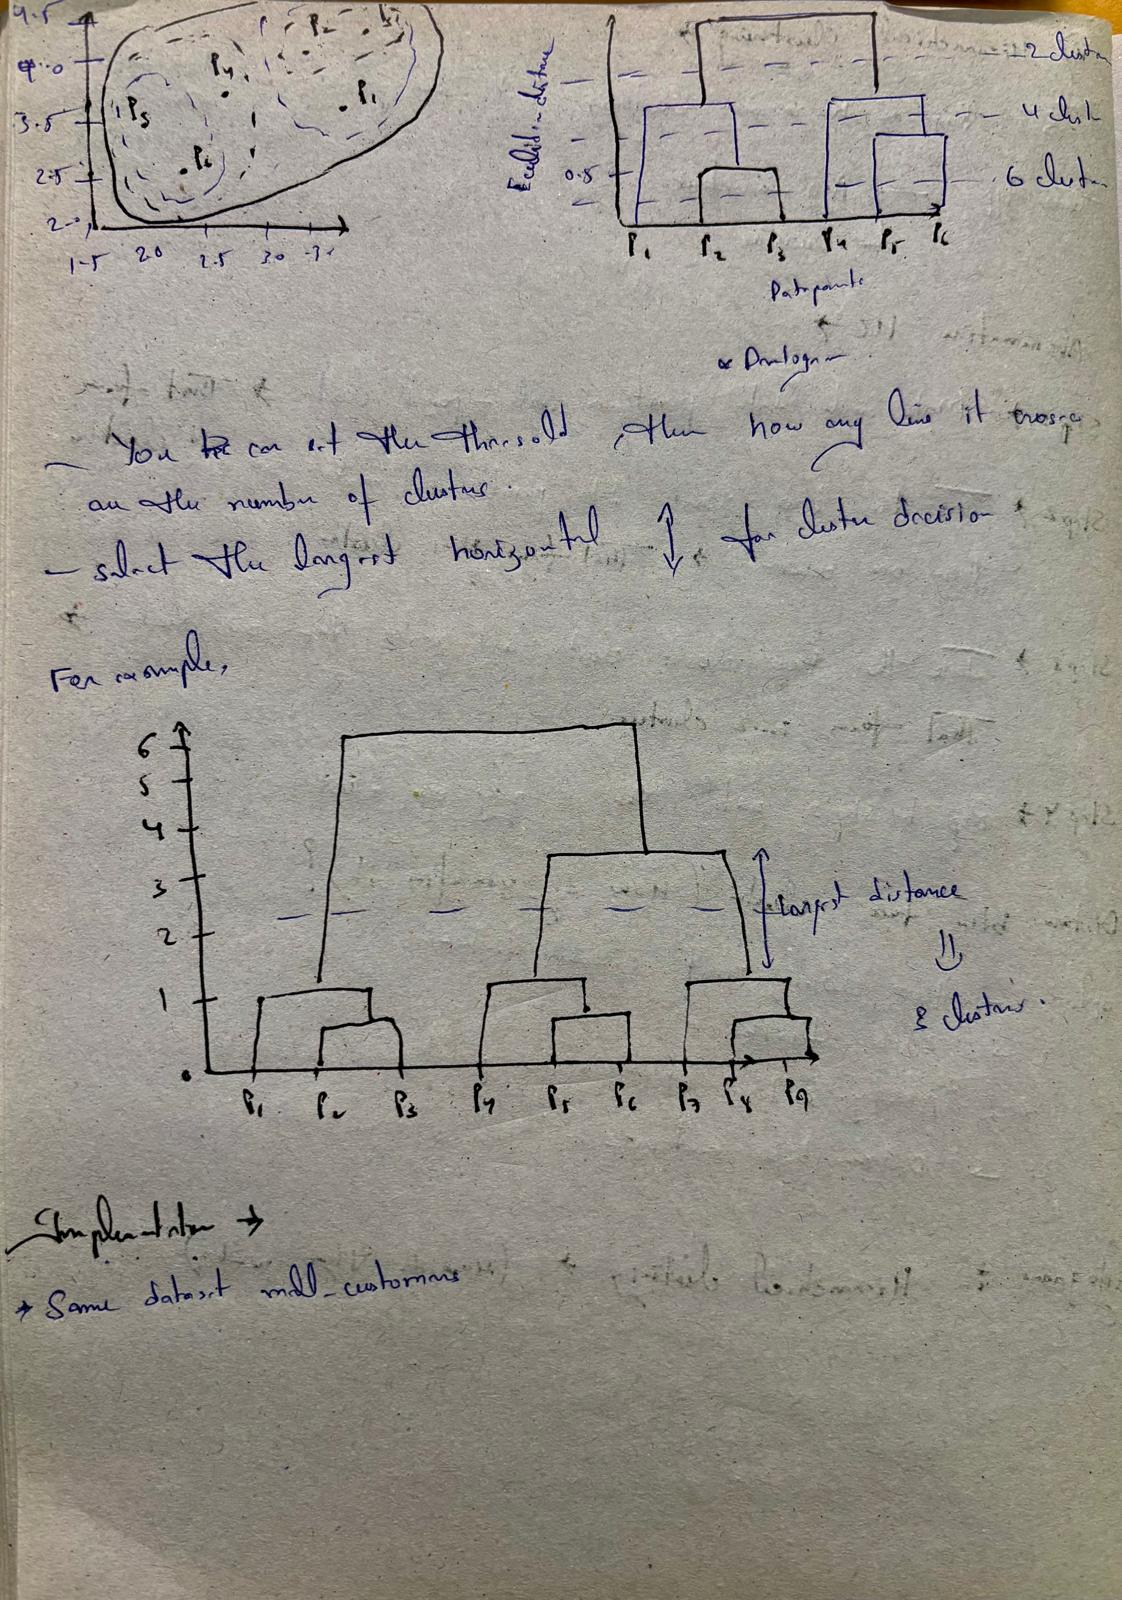

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the dendrogram to find the optimal number of clusters

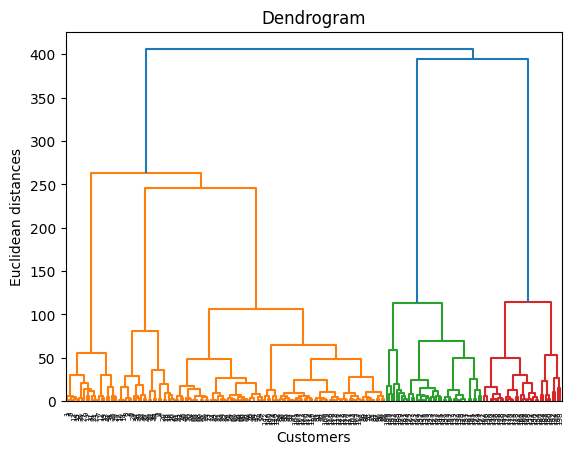

In [3]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

You're now diving into **Hierarchical Clustering** and creating a **dendrogram** — a tree-like diagram that shows how data points are grouped together. 🌳📊

Let’s break it down:

---

## 📦 What the Code Does:

```python
import scipy.cluster.hierarchy as sch
```

> You import SciPy’s hierarchy module — it provides tools for hierarchical clustering.

---

```python
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
```

### 🧠 What's Happening Here?

1. **`sch.linkage(X, method='ward')`**

   * Calculates the **linkage matrix**, which defines how clusters should be merged.
   * `method='ward'` tries to minimize **variance within each cluster**.
   * This is an **agglomerative method**: start with every point as its own cluster, and **merge closest clusters iteratively**.

2. **`sch.dendrogram(...)`**

   * Builds the actual **dendrogram plot** from the linkage matrix.
   * Shows the merging steps visually.

---

### 📊 The Dendrogram Plot

* **X-axis**: Each sample (e.g., customer ID)
* **Y-axis**: **Euclidean distance** (or dissimilarity) between clusters when they were merged

> The **height of the vertical lines** shows how far apart the clusters were when they merged.

---

### 📌 Why Use It?

To help choose the **optimal number of clusters**:

* Look for the **largest vertical distance (gap)** between horizontal merge lines.
* Draw a horizontal line that cuts **fewest vertical lines** → That gives you the **best k (number of clusters)**.

This is like the **elbow method**, but for hierarchical clustering.

---

## ✅ Summary

| Code                 | Meaning                                        |
| -------------------- | ---------------------------------------------- |
| `linkage(X, 'ward')` | Build hierarchy based on cluster distances     |
| `dendrogram(...)`    | Plot a merge tree of the clustering process    |
| Dendrogram height    | Shows how far clusters were when merged        |
| Horizontal cut       | Determines optimal number of clusters visually |

---

## Training the Hierarchical Clustering model on the dataset

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(X)

Great question, Tushar! Understanding the difference between `.fit()` and `.fit_predict()` is crucial — especially in **unsupervised learning** like clustering.

Let’s break it down clearly:

---

## ✅ `.fit()` vs `.fit_predict()`

| Method           | What it does                                    | Return Value                              |
| ---------------- | ----------------------------------------------- | ----------------------------------------- |
| `fit(X)`         | **Trains** the model on `X`                     | Returns the model itself (no predictions) |
| `fit_predict(X)` | Trains the model **and returns cluster labels** | Returns array of predicted cluster labels |

---

### 🔍 In Context of Clustering (like KMeans or AgglomerativeClustering):

#### 1. `.fit(X)`

```python
model = KMeans(n_clusters=3)
model.fit(X)
```

* Computes the clusters (centroids or hierarchy)
* Stores them **inside the model object**
* **Does NOT return labels** (you must call `.predict(X)` separately)

#### 2. `.fit_predict(X)`

```python
labels = KMeans(n_clusters=3).fit_predict(X)
```

* Trains the model just like `.fit(X)`
* **Immediately returns the cluster label** (e.g., `[0, 1, 1, 0, 2, ...]` for each point)
* Saves you a step

---

### ✅ When to Use Which?

| Use `.fit()` when...                                             | Use `.fit_predict()` when...        |
| ---------------------------------------------------------------- | ----------------------------------- |
| You want to **train and predict separately**                     | You want **labels immediately**     |
| You might need to call `.predict(X_new)` later                   | You're only doing one-time analysis |
| You care about model inspection (e.g., `model.cluster_centers_`) | You're only plotting clusters       |

---

### 🧪 Quick Example:

```python
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

# Separate steps:
kmeans.fit(X)
labels = kmeans.predict(X)

# One-liner:
labels = kmeans.fit_predict(X)
```

Both give the same result. The second is just **shorter and cleaner** when prediction is immediate.

## Visualising the clusters

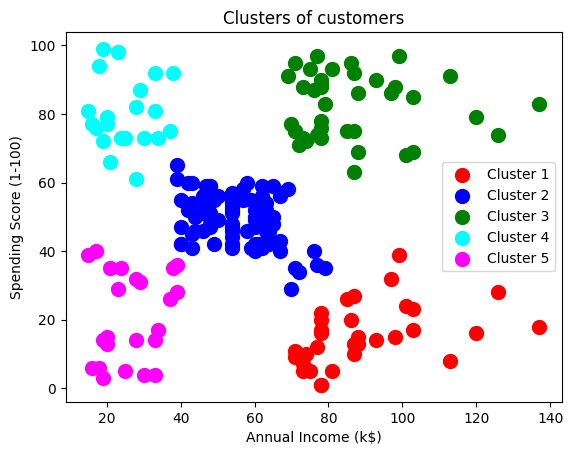

In [7]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()